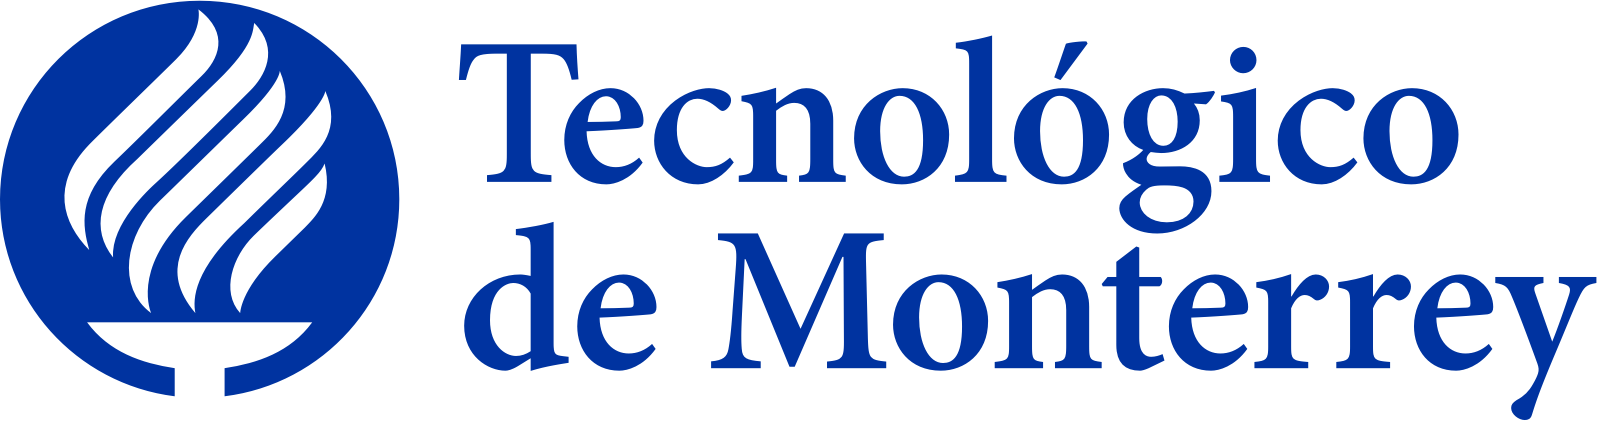

**Materia: Proyecto Integrador** <br>
Profesores titulares: <br>
Dra. Grettel Barceló Alonso <br>
Dr. Luis Eduardo Falcón Morales
                      
Nombre: Francisco Javier Hernandez Camarillo <br>
Matricula: a00998083

***Avance 5. Modelos alternativos*** <br>
Equipo. 24

# Avance 5
## Optimización de hiperparámetros 


La optimización de hiperparámetros es una etapa crucial en el proceso de aprendizaje automático para encontrar la configuración óptima de los hiperparámetros de un modelo. Los hiperparámetros son variables que controlan el comportamiento del modelo durante el entrenamiento, como la tasa de aprendizaje, el tamaño del lote y el número de épocas.
La optimización de hiperparámetros puede mejorar significativamente el rendimiento del modelo, como la precisión, la velocidad de convergencia y la generalización a nuevos datos.

Evita el sobreajuste y el infraajuste. Un ajuste adecuado de los hiperparámetros puede evitar el sobreajuste (el modelo aprende demasiado del conjunto de entrenamiento y no generaliza bien a nuevos datos) y el infraajuste (el modelo no aprende lo suficiente del conjunto de entrenamiento).

Métodos de Optimización de Hiperparámetros:
- **Búsqueda manual:** 
   - Se ajustan manualmente los hiperparámetros y se evalúa el rendimiento del modelo para cada configuración.
- **Búsqueda en cuadrícula (Grid Search)**
    - Evalúa exhaustivamente un conjunto predefinido de combinaciones de hiperparámetros. Crea una cuadrícula con todas las combinaciones posibles a partir de rangos específicos para cada hiperparámetro.
- **Búsqueda aleatoria (Random Search)**
    - Muestra aleatoriamente combinaciones de hiperparámetros de un espacio de búsqueda especificado. Se enfoca en la exploración para encontrar potentially buenas combinaciones fuera de una cuadrícula fija.
- **Búsqueda bayesiana (Bayesian Search)**
    - Utiliza un modelo probabilístico (por ejemplo, un proceso gaussiano) para estimar el rendimiento de combinaciones de hiperparámetros no vistas. Selecciona las combinaciones que tienen más probabilidades de mejorar el rendimiento del modelo basado en evaluaciones anteriores.
- **Búsqueda Yolo (Genetic evolution and mutation)**
    - Ultralytics YOLO utiliza algoritmos genéticos para optimizar los hiperparámetros. Los algoritmos genéticos se inspiran en el mecanismo de la selección natural y la genética.
    - Mutación: En el contexto de Ultralytics YOLO , la mutación ayuda a buscar localmente el espacio de hiperparámetros aplicando pequeños cambios aleatorios a los hiperparámetros existentes, produciendo nuevos candidatos para la evaluación.
    - Cruzamiento: Aunque el cruce es una técnica de algoritmo genético muy popular, actualmente no se utiliza en Ultralytics YOLO para el ajuste de hiperparámetros. La atención se centra principalmente en la mutación para generar nuevos conjuntos de hiperparámetros.


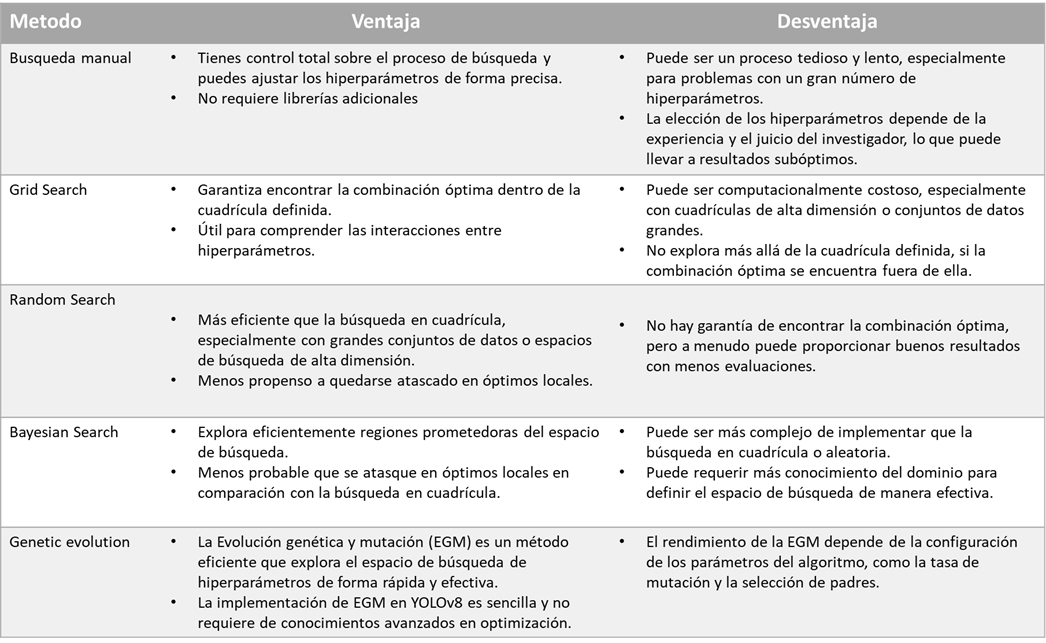

## Optimizacion de hiperparámetros opción 1.

Para este tipo de optimización es necesario especificar las constantes que va a tener durante el proceso, elegimos el número de épocas que se había determinado anteriormente, las iteraciones que tendrá la optimización y el optimizador que recomienda Yolo.

In [3]:
from ultralytics import YOLO
#cargar el modelo pre-entrenado
model = YOLO('yolov8n.pt')

#comando para empezar el proceso de optimizacion de hiperparametros
model.tune(data=r'C:\Users\javier\Documents\corridaFinal\dataset.yaml', epochs=200, iterations=100, optimizer='AdamW', plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/100 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
WARNING ❌️ training failure for hyperparameter tuning iteration 1
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=yolov8n.pt', 'data=C:\\Users\\javier\\Documents\\corridaFinal\\dataset.yaml', 'epochs=30', 'time=None', 'patience=50', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 

KeyboardInterrupt: 

Fitness vs iteration
Se trata de un gráfico que muestra la aptitud frente al número de iteraciones. Te ayuda a visualizar el rendimiento del algoritmo genético a lo largo del tiempo.


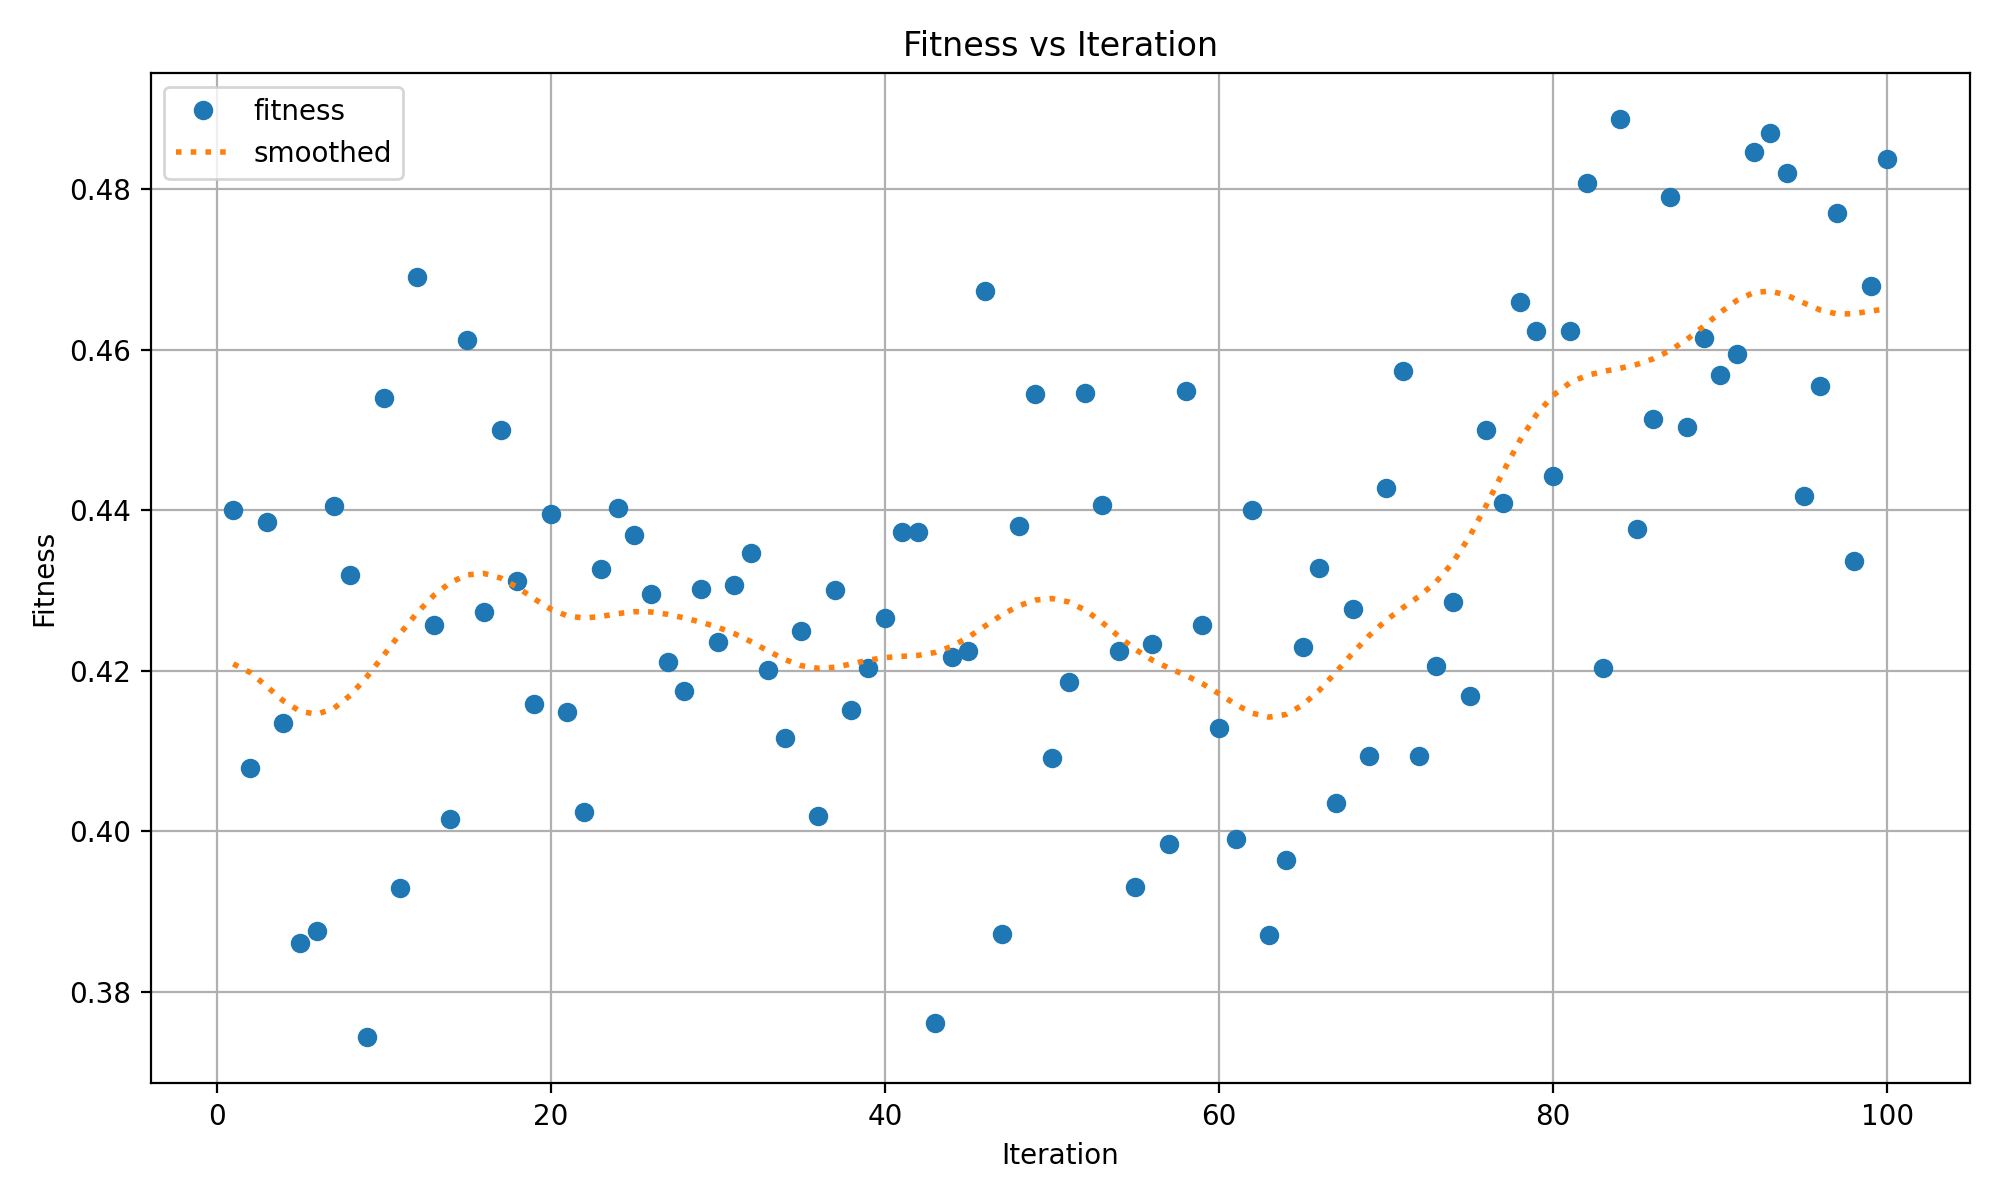

Grafico de dispersión:
Este archivo contiene gráficos de dispersión ayudándote a visualizar las relaciones entre los distintos hiperparámetros y las métricas de rendimiento.


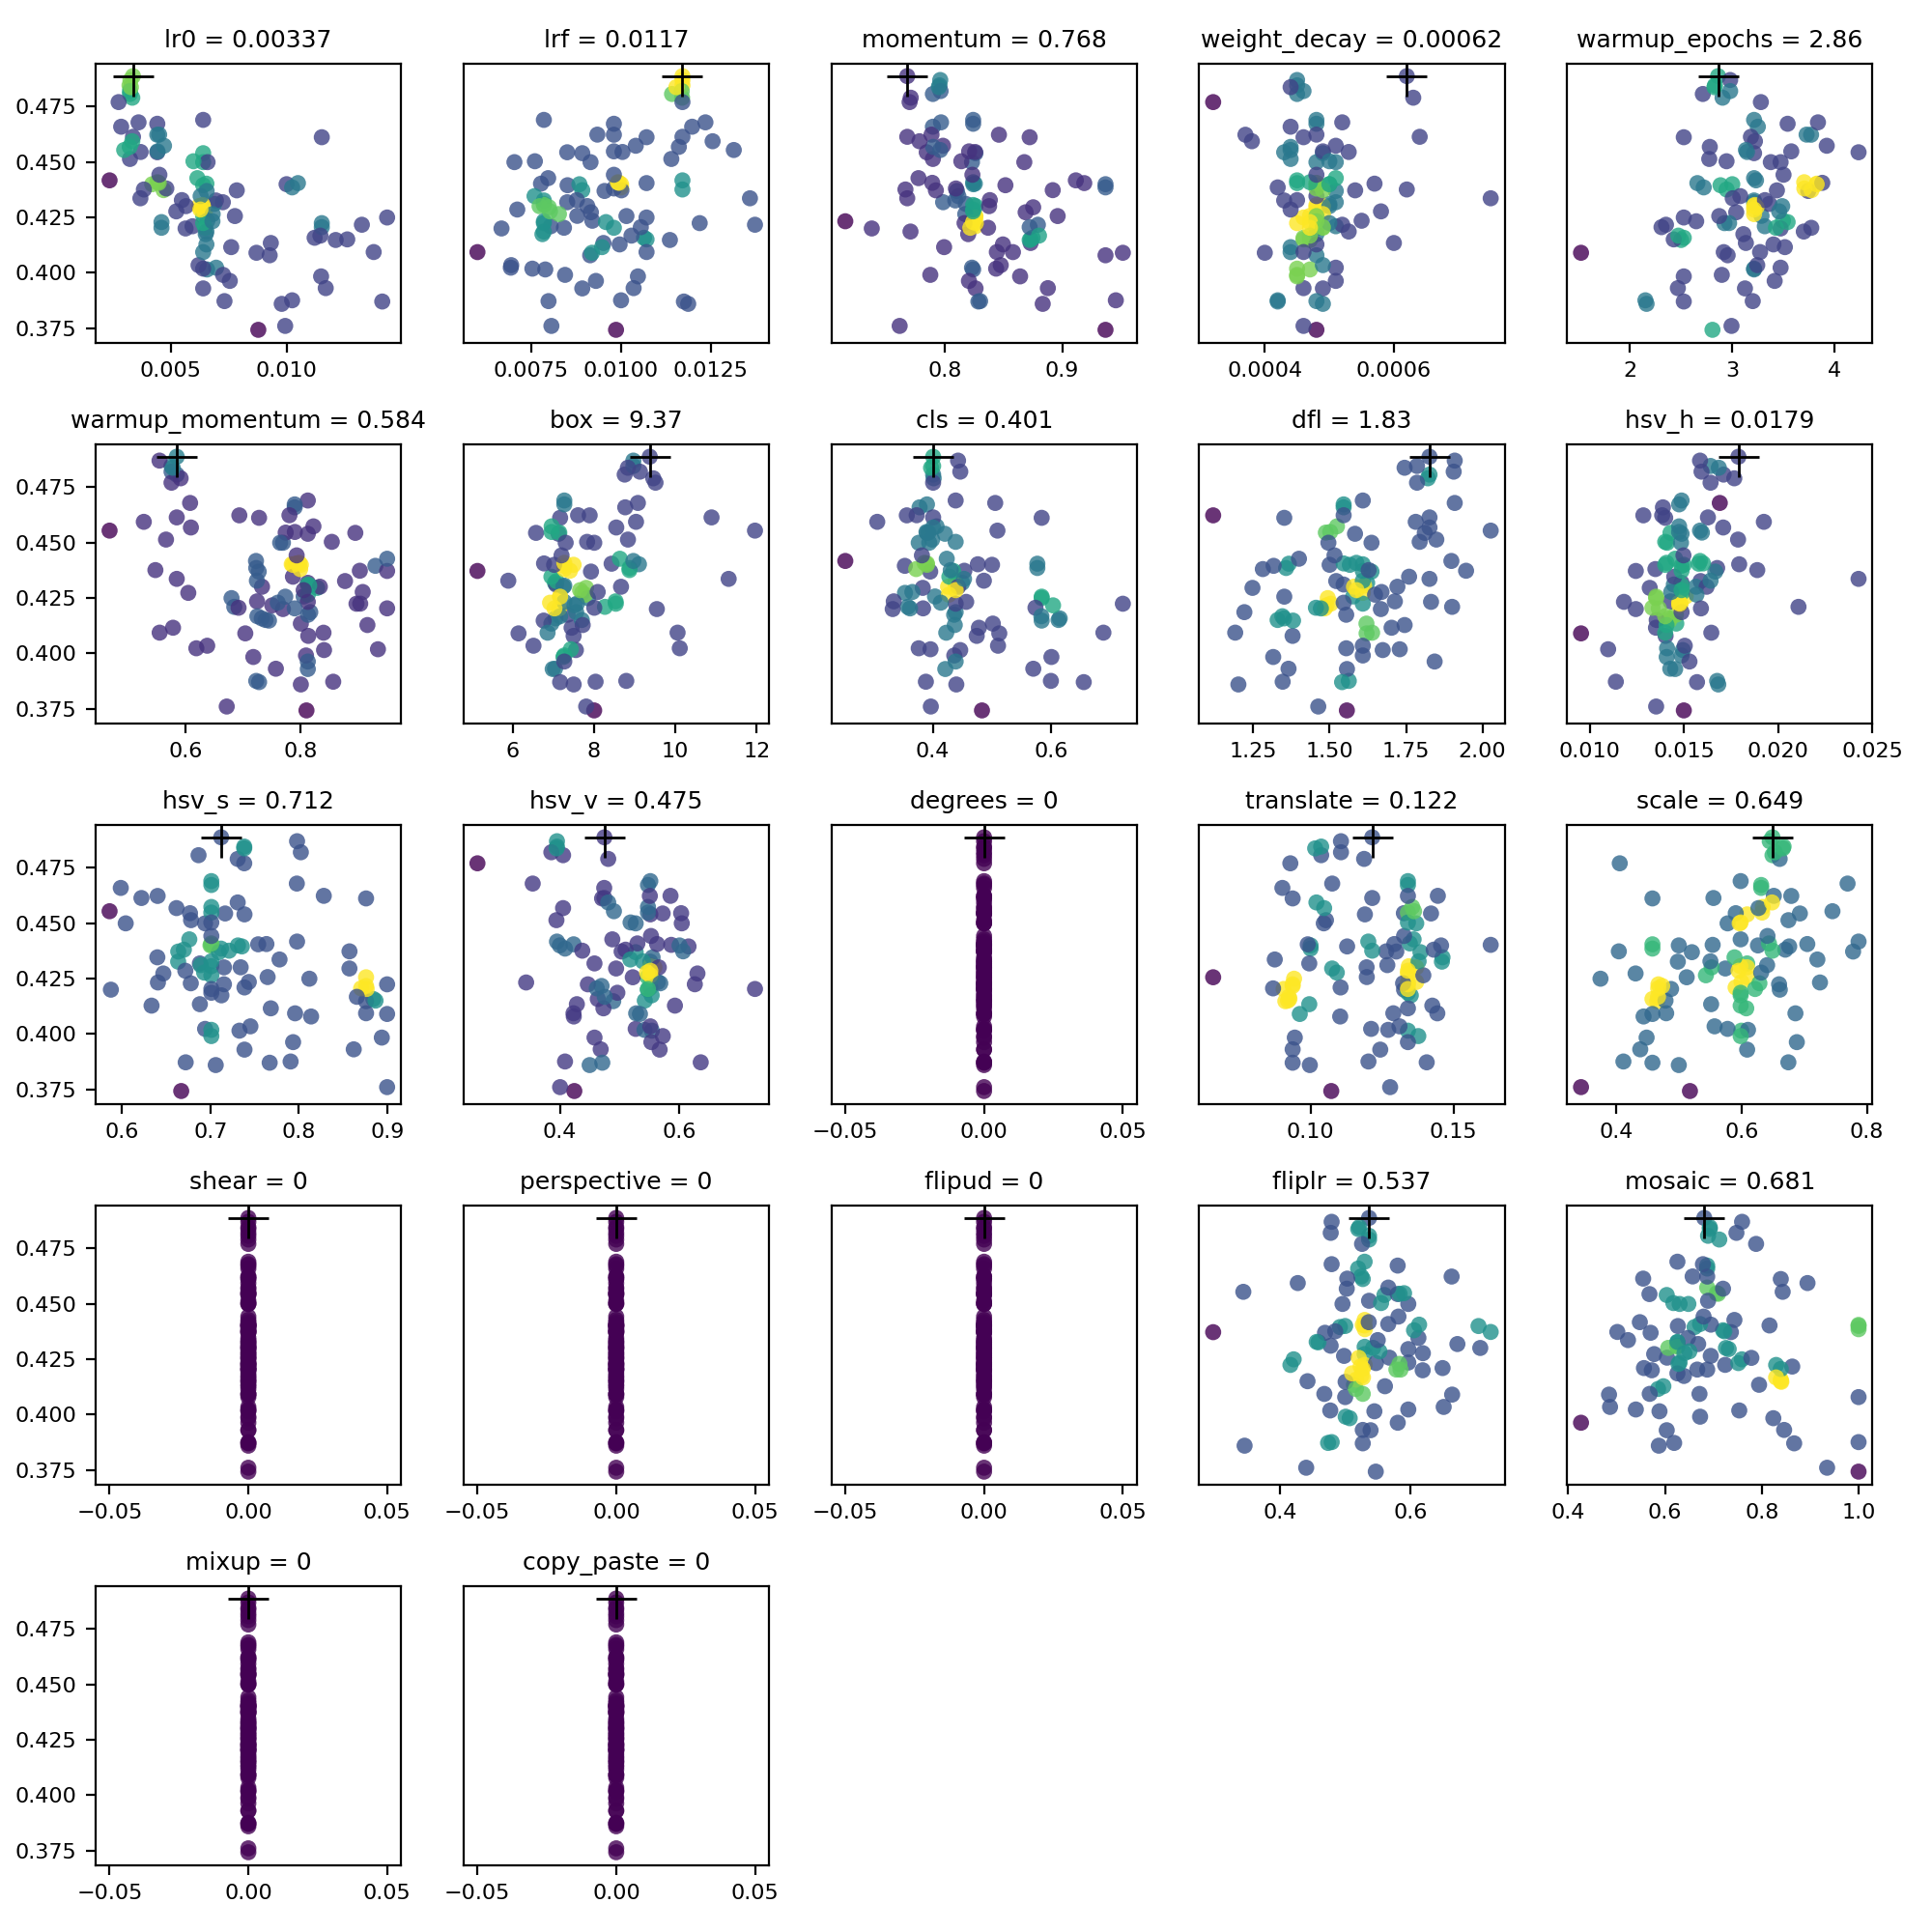


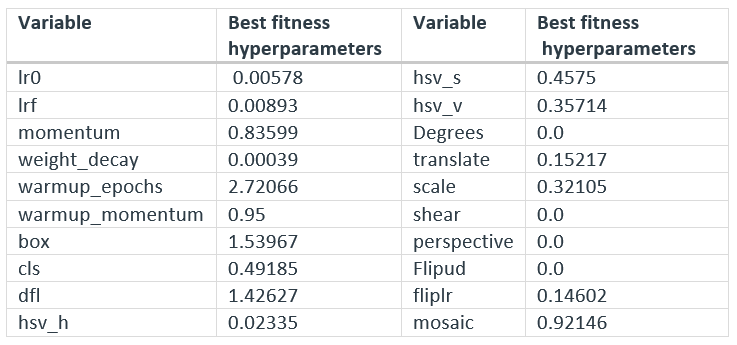

## Evaluacion del modelo con hiperparametros optimizado.


In [8]:
from ultralytics import YOLO

model = YOLO(r"C:\Users\javier\Documents\corridaFinal\runs\detect\tune_200e_100i\weights\best.pt",task="detect")
# Validate the model
metrics = model.val(data=r"C:\Users\javier\Documents\corridaFinal\dataset2.yaml")  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category

Ultralytics YOLOv8.1.9 🚀 Python-3.10.13 torch-2.2.0+cpu CPU (AMD Ryzen 5 2600 Six-Core Processor)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\javier\Documents\corridaFinal\yoloTrain\labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


                   all         77        407       0.84      0.688      0.815      0.452
Speed: 0.7ms preprocess, 67.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val4


array([    0.45226])

<table>
<thead>
<tr><th>Model</th><th>mAP50</th><th>precision</th><th>recall</th></tr>
</thead>
<tbody>
<tr><td>geneticMutation.pt</td><td>81.5 %</td><td>84.0 %</td><td>68.8 %</td></tr>
</tbody>
</table>


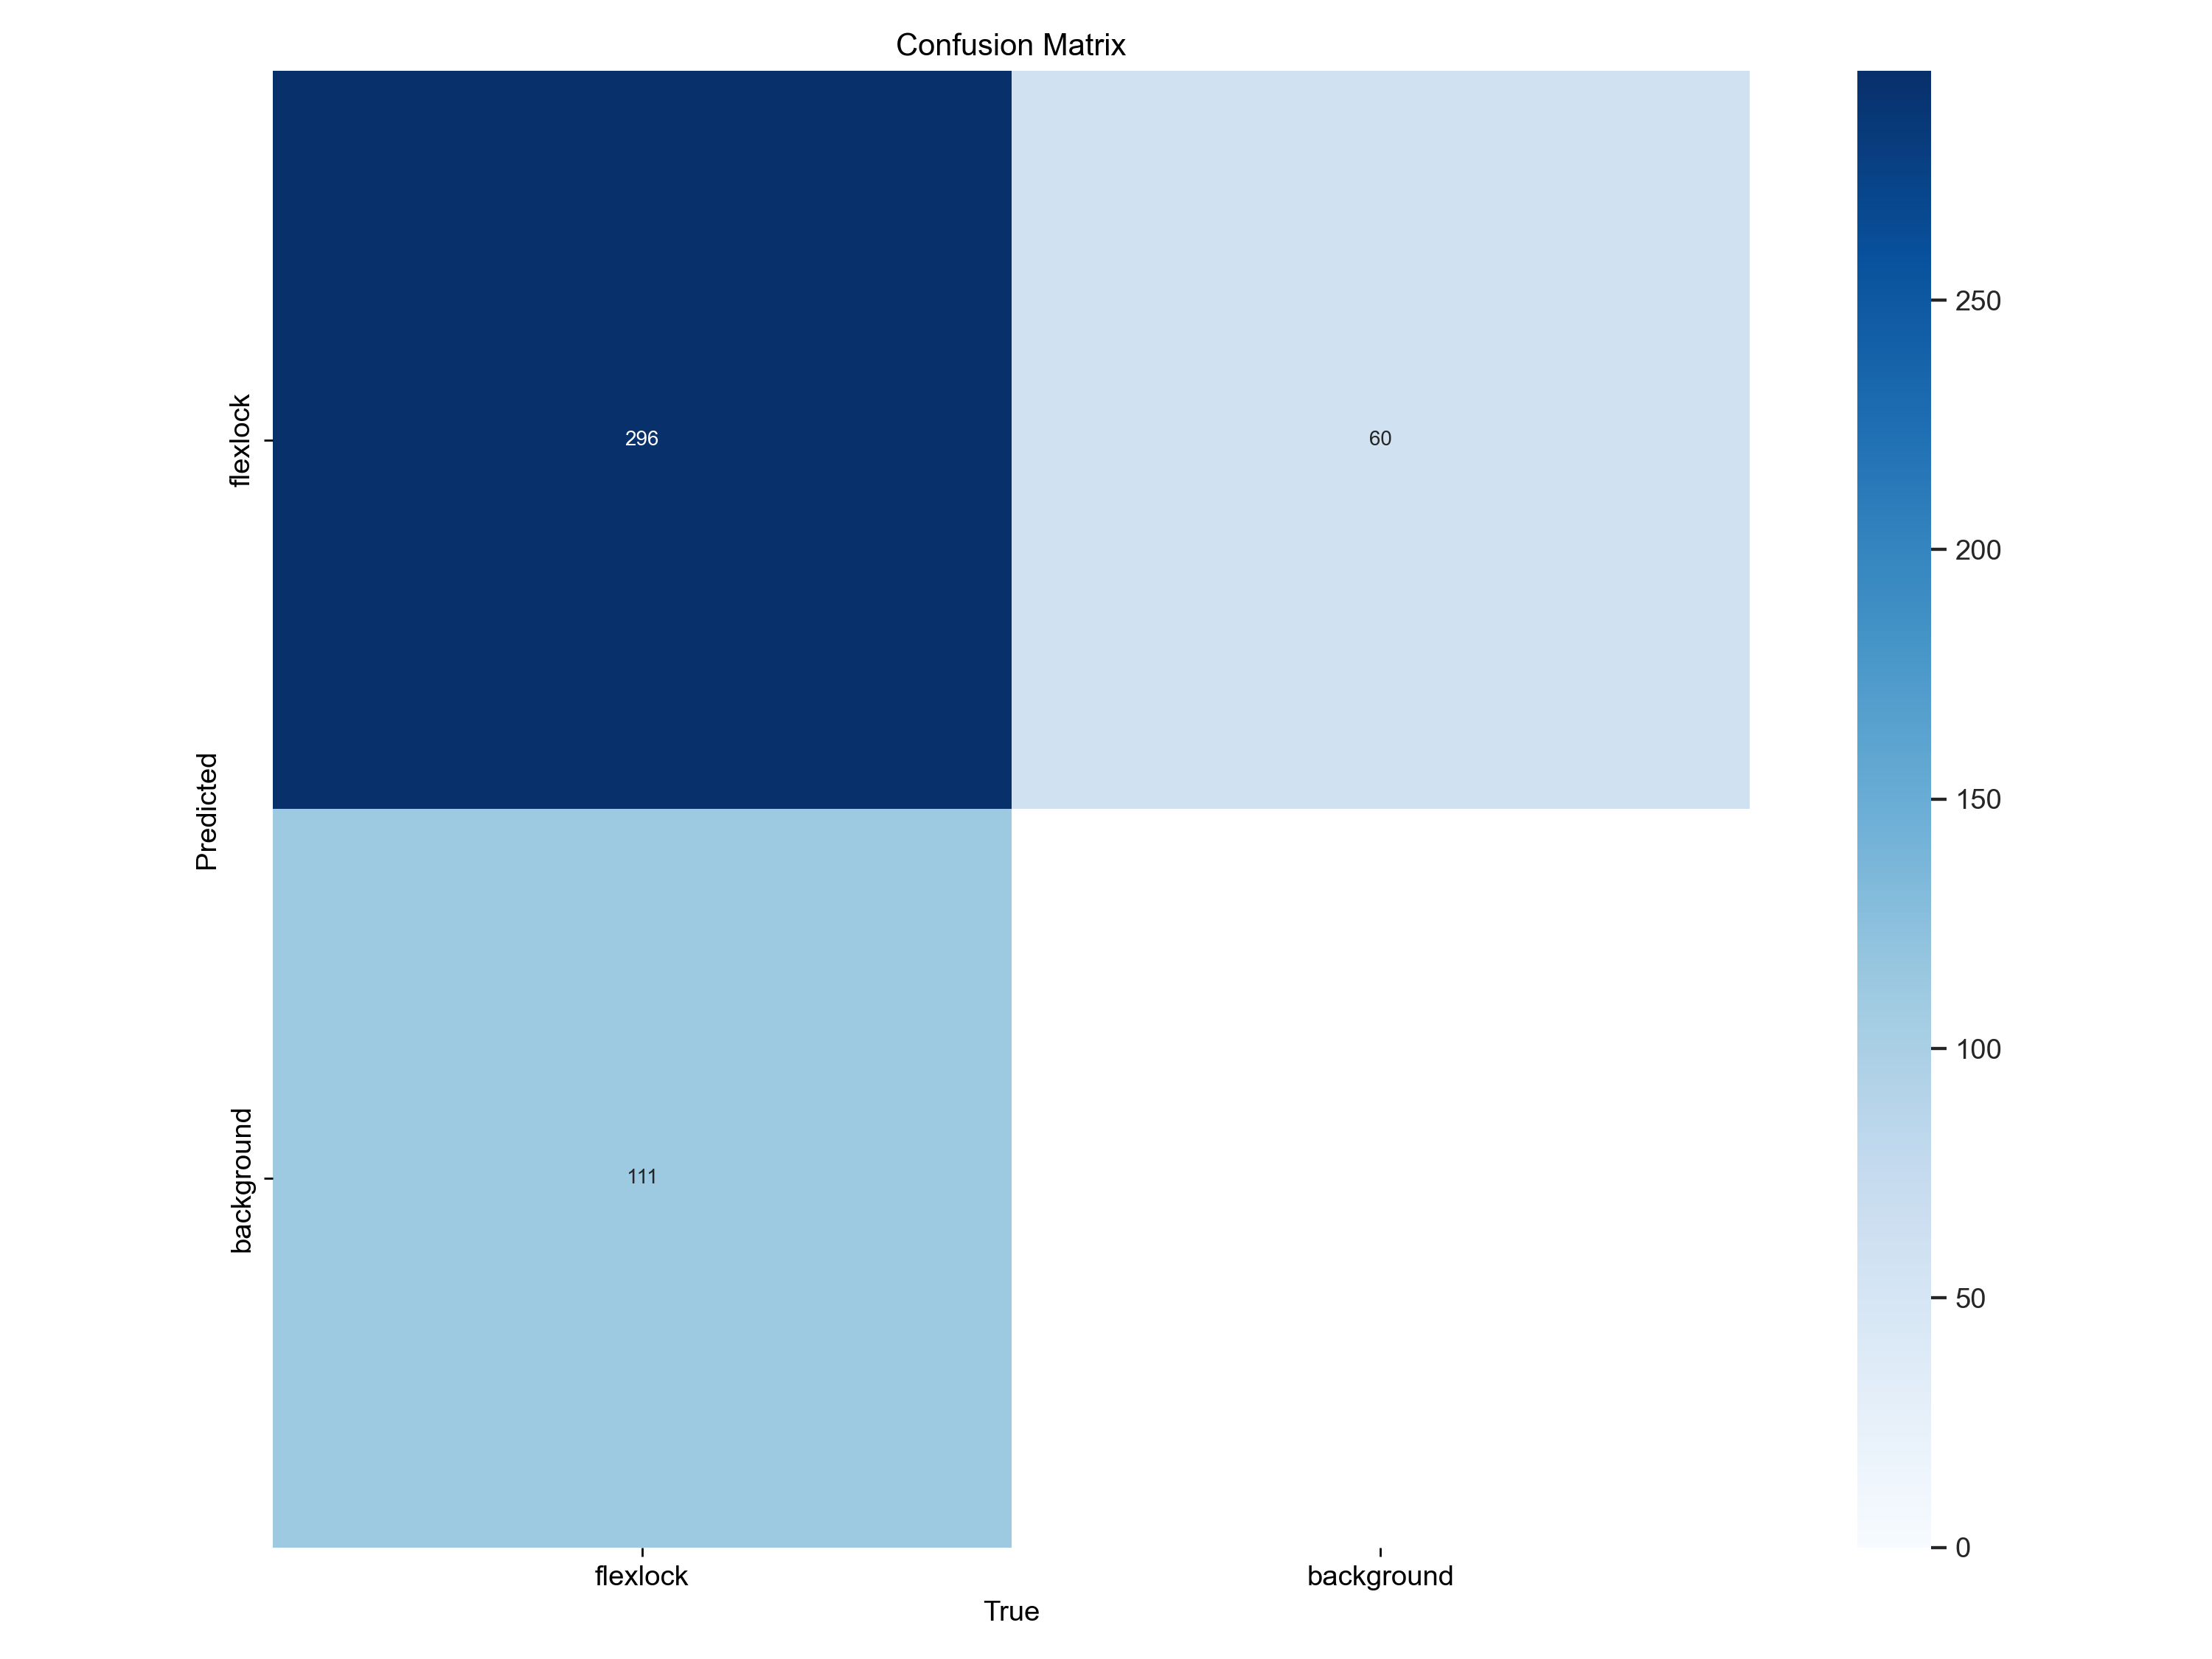

## Optimizacion de hiperparámetros opción 2.

### Fine tuning with weights and biases

Yolov8 tiene +45 hiperparametros que pueden ser ajustados durante el entrenamiento. 

Se escogieron los mas relevantes para ser ajustados durante la optimización.
- Épocas (epochs): Número total de épocas de entrenamiento. Cada época representa una pasada completa por todo el conjunto de datos. Ajustar este valor puede afectar a la duración del entrenamiento y al rendimiento del modelo.
- Tamaño del lote (batch): Determina la cantidad de muestras procesadas antes de que el modelo actualice sus pesos.
- Optimizer: Activa la salida detallada durante el entrenamiento, proporcionando registros detallados y actualizaciones del progreso. Útil para depurar y supervisar de cerca el proceso de entrenamiento.
- Tasa de aprendizaje inicial  (lr0): El ajuste de este valor es crucial para el proceso de optimización, ya que influye en la rapidez con que se actualizan las ponderaciones del modelo. Controla cuánto ajustar el modelo en respuesta al error estimado cada vez que se actualizan los pesos del modelo.
- Amp: Permite el entrenamiento Automático de Precisión Mixta (AMP), reduciendo el uso de memoria y posiblemente acelerando el entrenamiento con un impacto mínimo en la precisión.
- cos_lr:  Utiliza un programador de la tasa de aprendizaje coseno, que ajusta la tasa de aprendizaje siguiendo una curva coseno a lo largo de las épocas. Ayuda a gestionar la tasa de aprendizaje para una mejor convergencia.
- Tasa de aprendizaje final (lrf): Tasa de aprendizaje final como fracción de la tasa inicial = (lr0 * lrf), que se utiliza junto con los programadores para ajustar el ritmo de aprendizaje a lo largo del tiempo.
- Aumento (augment): Indica si introducir cambios aleatorios en los datos de entrada, aumentando la robustez del modelo.
- Abandono (dropout): Es una técnica de regularización para prevenir el sobreajuste.
- Factor de impulso (Momentum): Factor de impulso para SGD o beta1 para optimizadores Adam, que influye en la incorporación de gradientes pasados en la actualización actual.
- Término de regularización  (weight_decay): penaliza los pesos grandes para evitar el sobreajuste.

Valores seteados para la optimización de los hiperparametros.


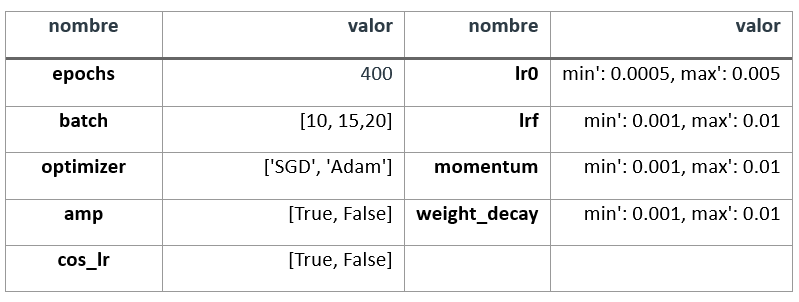

Nos centramos en maximizar el valor de mAP50, que es métrica recomendad para aplicaciones yolo de detección.

### ¿Por qué Maximizar mAP50 y no maP50-95?

mAP50 significa Precisión Media Promedio con un IoU de 0.5. En términos simples, evalúa cuán bien las cajas delimitadoras predichas por nuestro modelo se superponen con las cajas delimitadoras reales. Maximizar mAP50 significa que nuestro modelo no solo está detectando objetos, sino que también está ubicándolos con precisión. Debido a que el objetivo es detectar tipos de vehículos durante el día, la noche y en condiciones climáticas adversas, asegurar un alto mAP50 es aún más crucial.. ¿Por qué elegí maximizar mAP50 sobre mAP50-95? Al entrenar nuestro modelo por primera vez con hiperparámetros predeterminados, observé que mAP50 alcanzó su valor óptimo alrededor de la marca de 30 épocas, mientras que mAP50-95 tomó más tiempo, estabilizándose solo alrededor de 50 épocas. Notablemente, un alto mAP50 a menudo indicaba un mAP50-95 igualmente alto. Dado este comportamiento, para fines de optimización de hiperparámetros, elegí centrarme en maximizar mAP50. Este enfoque nos permite acortar cada evaluación, permitiendo una exploración más eficiente de diversas combinaciones de parámetros.



### running code

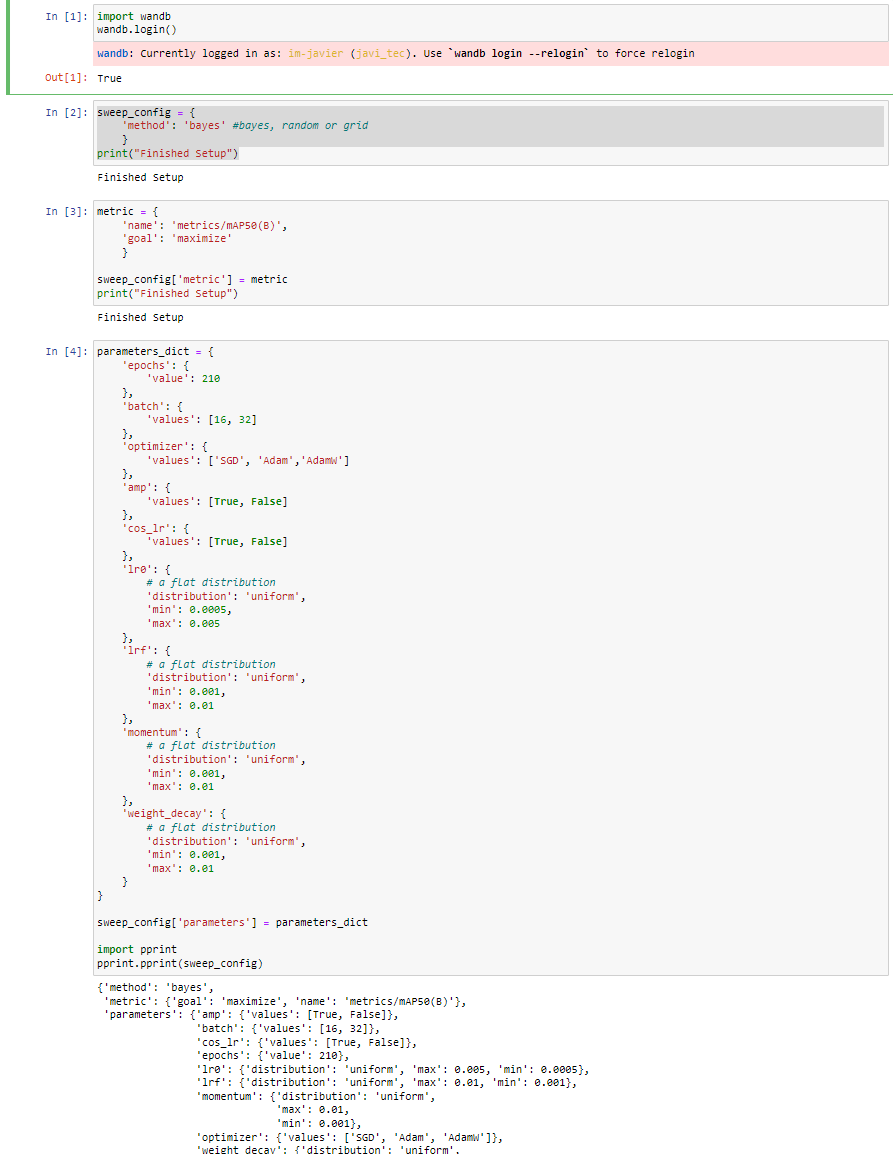

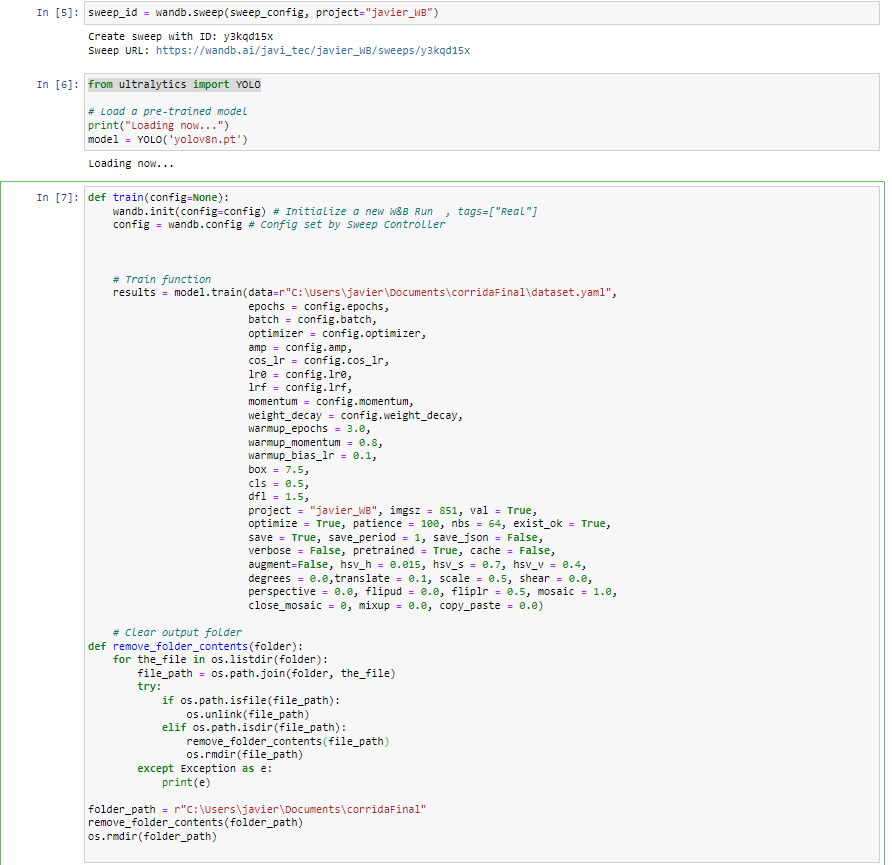

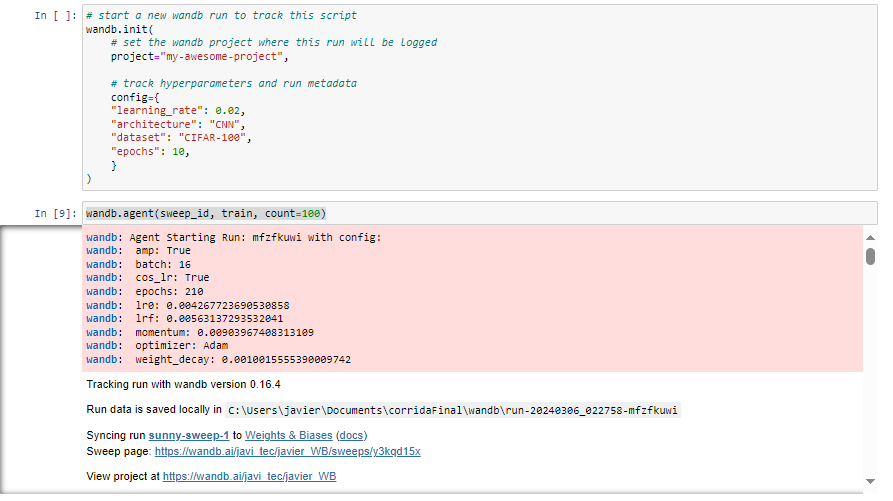

### Resultados optimización bayesiana

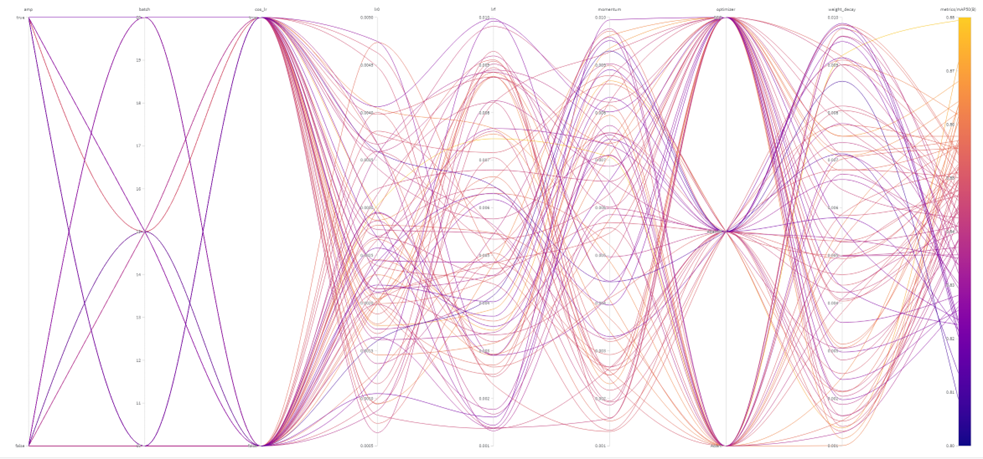

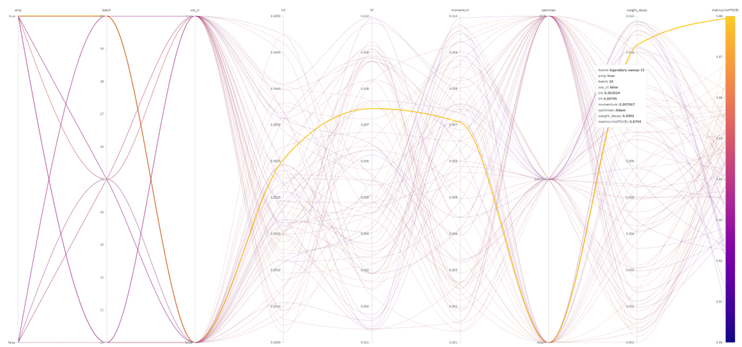

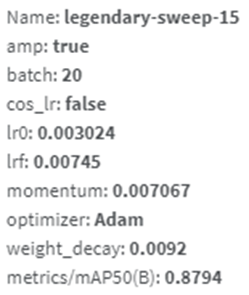

Importancia de parámetros:

Top 3: momentum,weight_decay y lrf

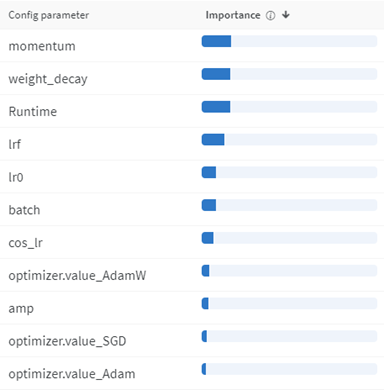

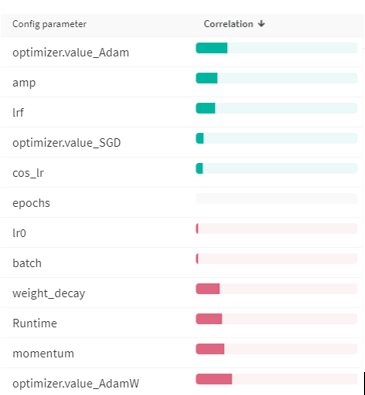

Hiperparámetros finales:

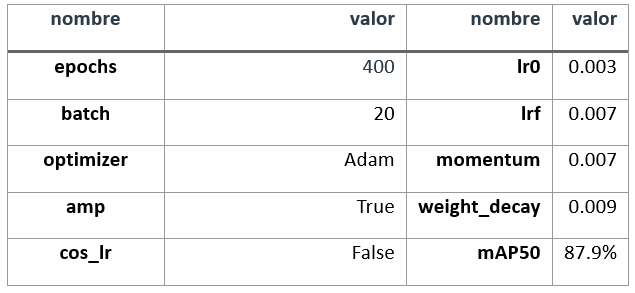



In [10]:
from ultralytics import YOLO

model = YOLO(r"C:\Users\javier\Documents\corridaFinal\runs\detect\wandb_best.pt",task="detect")
# Validate the model
metrics = model.val(data=r"C:\Users\javier\Documents\corridaFinal\dataset.yaml")  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category


Ultralytics YOLOv8.1.9 🚀 Python-3.10.13 torch-2.2.0+cpu CPU (AMD Ryzen 5 2600 Six-Core Processor)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\javier\Documents\corridaFinal\yoloTest\labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]


                   all         30        229      0.854       0.69      0.824      0.593
Speed: 1.7ms preprocess, 117.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val5


array([    0.59299])

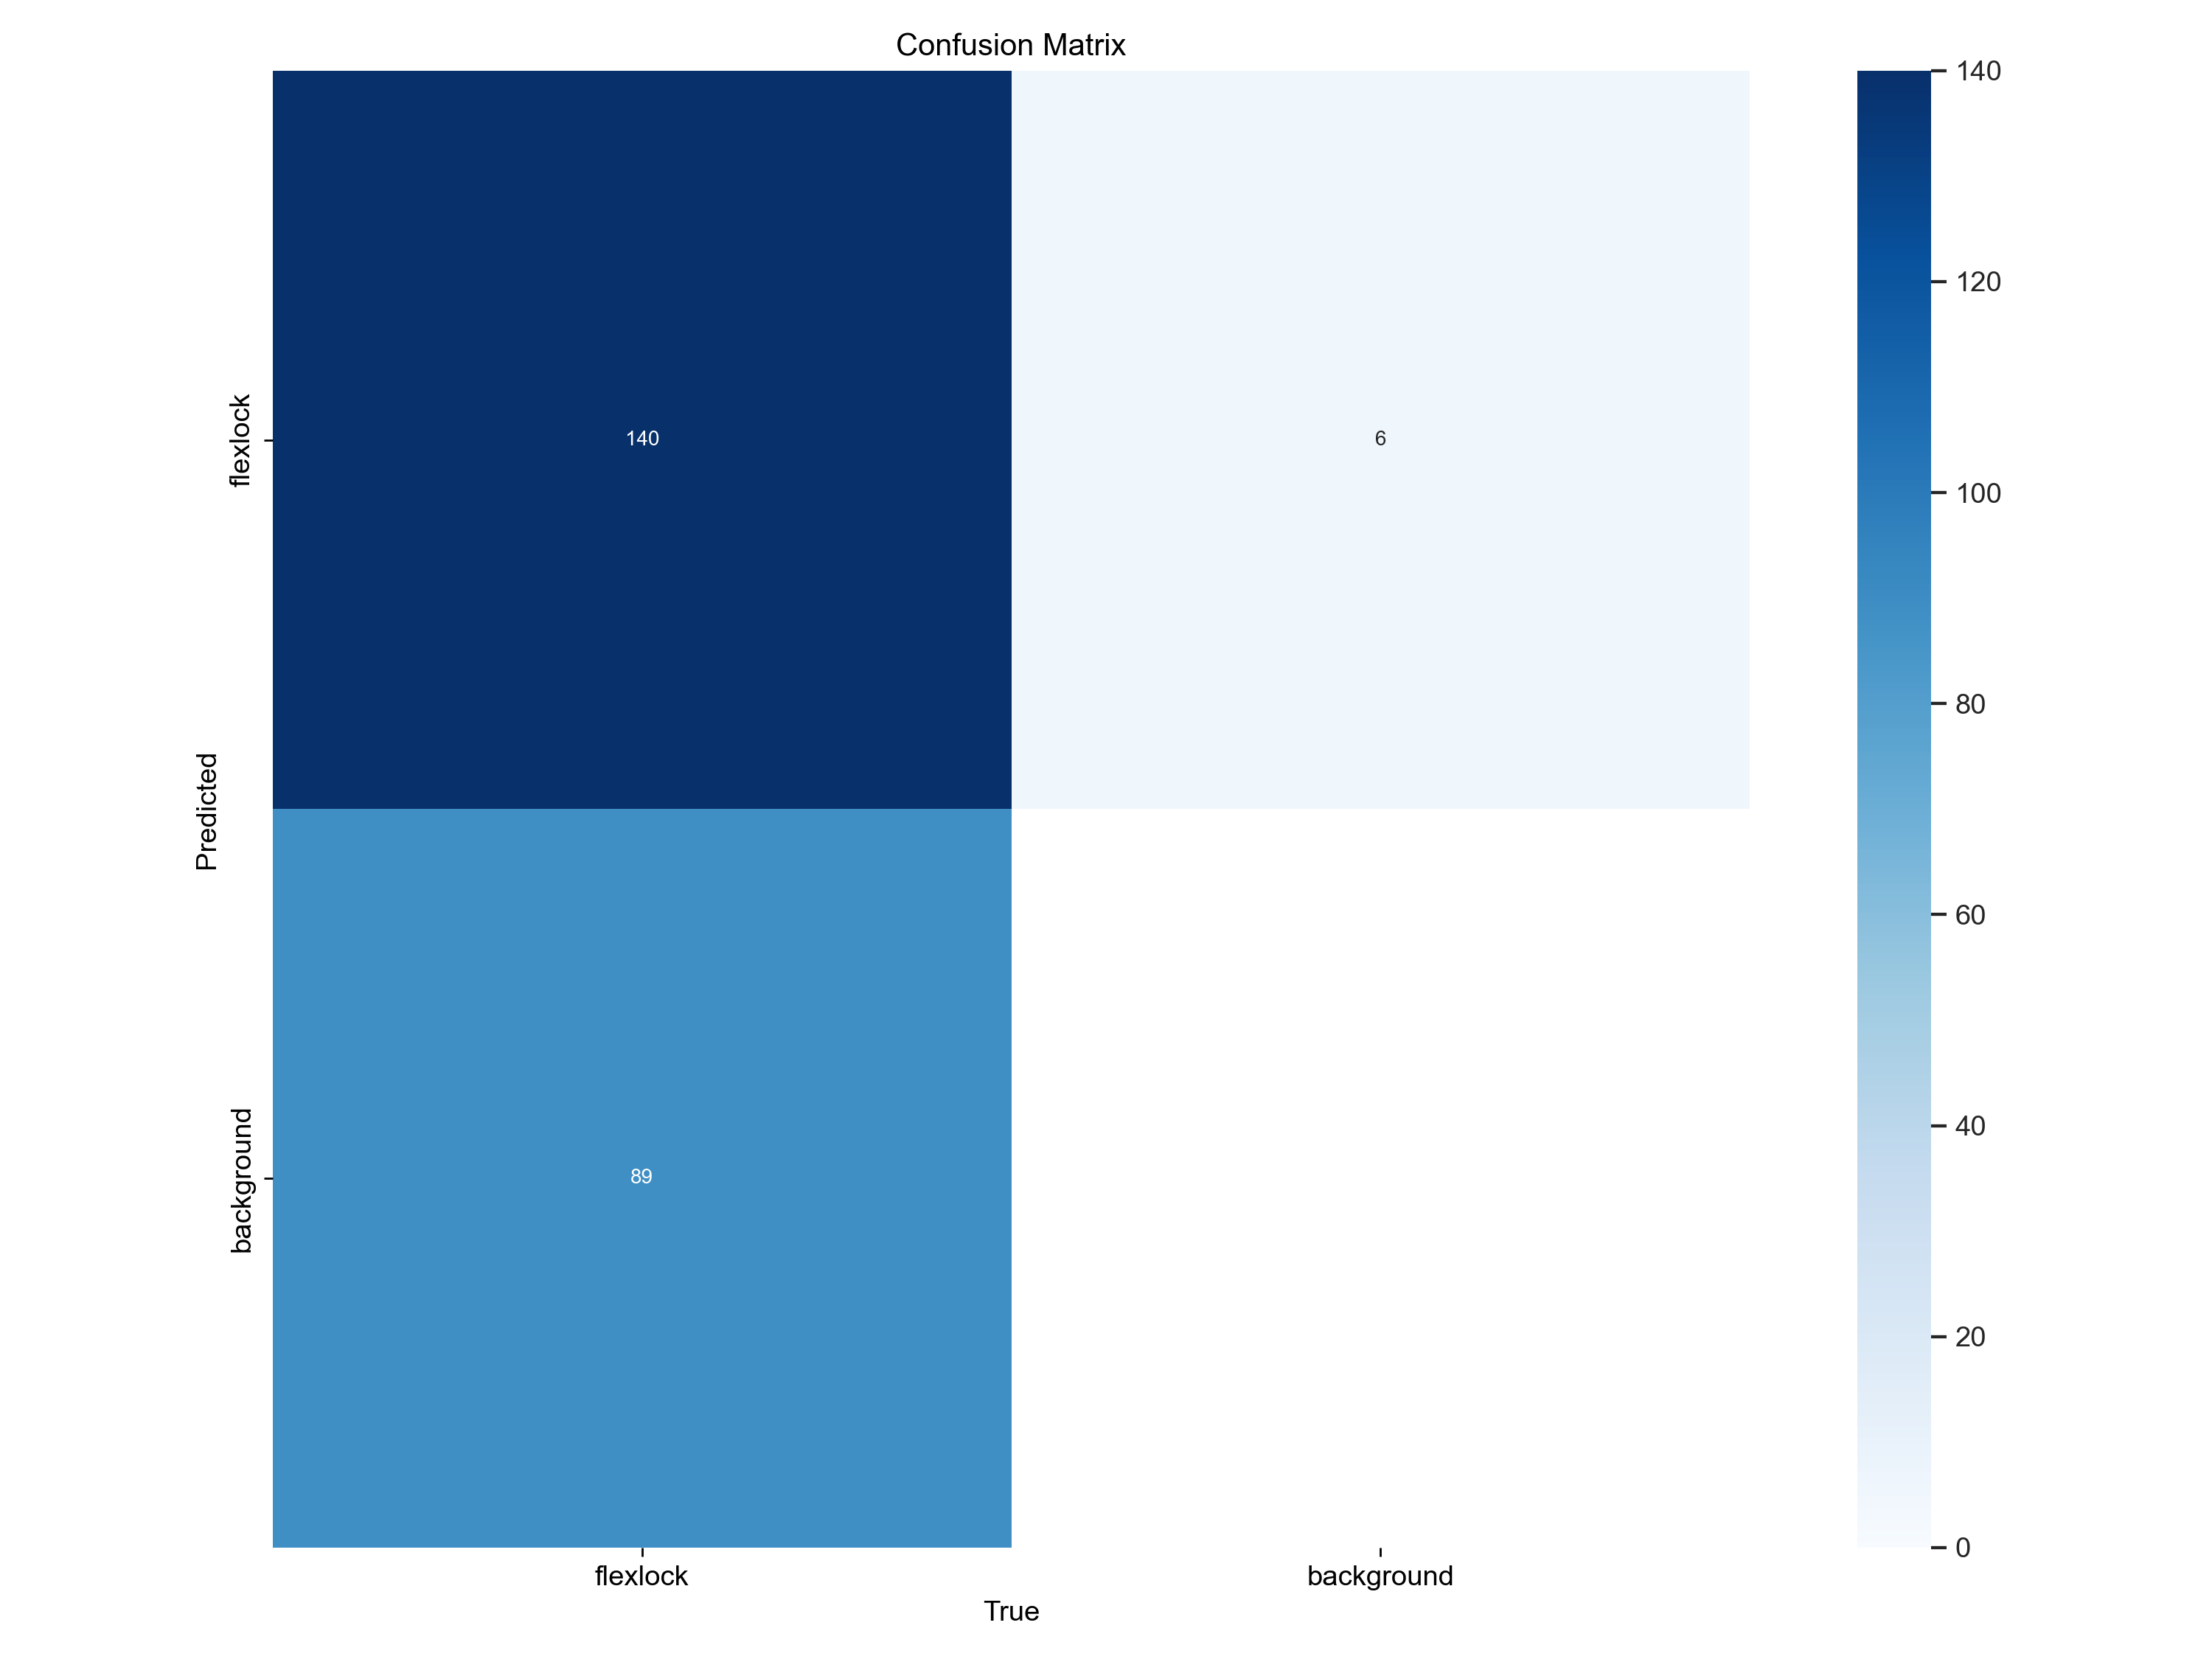

Metricas:

<table>
<thead>
<tr><th>Model</th><th>mAP50</th><th>precision</th><th>recall</th></tr>
</thead>
<tbody>
<tr><td>geneticMutation.pt</td><td>82.4%</td><td>85.4%</td><td>69.0%</td></tr>
</tbody>
</table>